# CUSTOMER SEGMENTATION USING K-MEANS

This Google Colab notebook is a comprehensive analysis of customer data in a mall using K-means clustering. The purpose of this analysis is to gain insights into customer behavior and segment them into distinct groups based on their purchasing habits. The data includes information such as customer age, gender, annual income, and spending score. By performing K-means clustering, we aim to identify patterns in the data and better understand our customers' needs and preferences. The results of this analysis will provide valuable insights that can be used to improve the mall's marketing strategies and customer service.

K-means clustering is a type of unsupervised machine learning algorithm used to group similar data points into clusters. It works by defining a target number of clusters (k) and iteratively finding the centroid of each cluster and re-assigning data points to the nearest centroid until the centroids are no longer changing. The final result is k clusters with similar data points in each cluster.

K-means clustering has many uses in various industries, including market segmentation, image compression, and anomaly detection. In market segmentation, it can be used to group customers into distinct categories based on their characteristics, behaviors, or purchasing habits. In image compression, it can be used to reduce the size of an image by grouping similar pixels together. In anomaly detection, it can be used to identify unusual or outlier data points in a dataset.

We begin by importing the data from Kaggle using the API command.

In [1]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle kernels list — user YOUR_USER — sort-by dateRun

!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Saving kaggle.json to kaggle.json
kaggle.json
usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: unrecognized arguments: — user YOUR_USER — sort-by dateRun
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.35MB/s]


In [2]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [15]:
# LIBRARIES

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

## EXPLORATORY DATA ANALYSIS

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.shape

(200, 5)

In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
plt.style.use('fivethirtyeight')

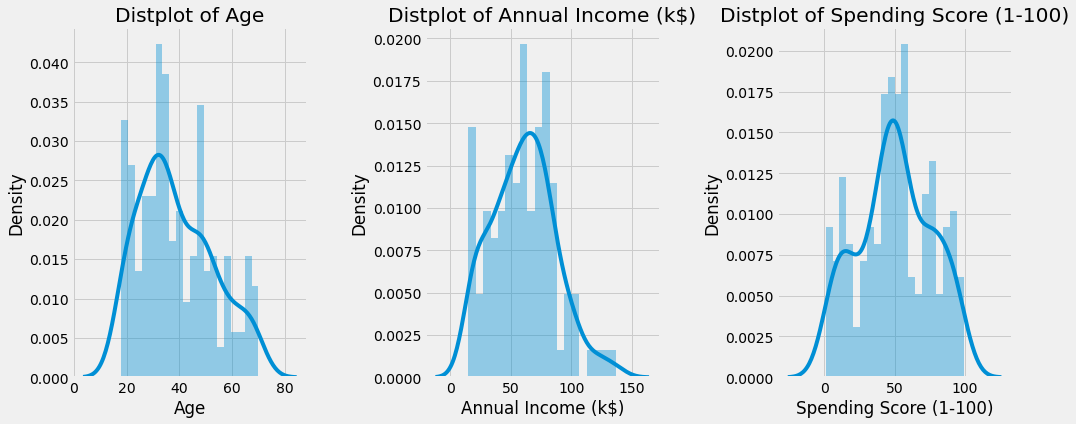

In [13]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
    sns.distplot(df[x], bins= 20)
    plt.title(f'Distplot of {x}')
plt.show()

In [14]:
data = [go.Histogram(x=df[x], name=x, histnorm='probability density') for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
layout = go.Layout(title='Distplot of variables', xaxis=dict(title='Value'), yaxis=dict(title='Density'))
fig = go.Figure(data=data, layout=layout)
fig.show()

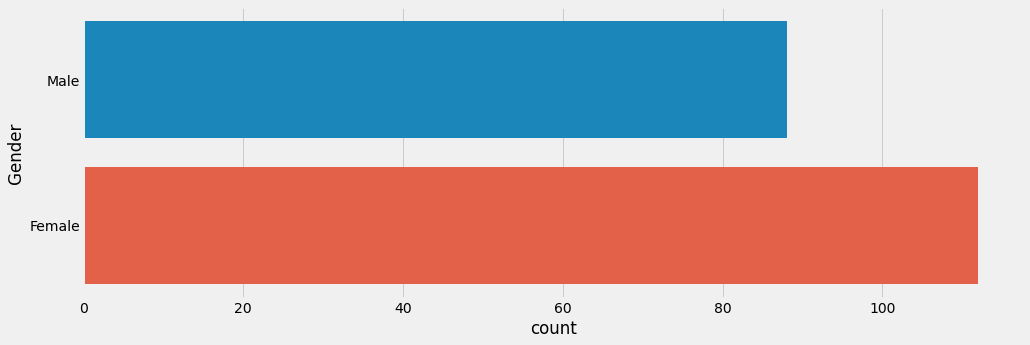

In [17]:
plt.figure(1, figsize= (15,5))
sns.countplot(y= 'Gender', data=df)
plt.show()

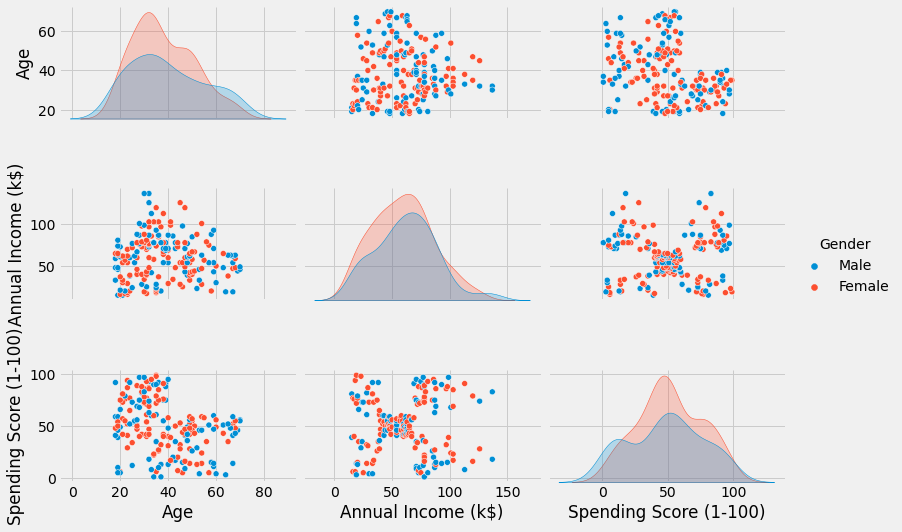

In [18]:
X = df.copy()
sns.pairplot(X.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

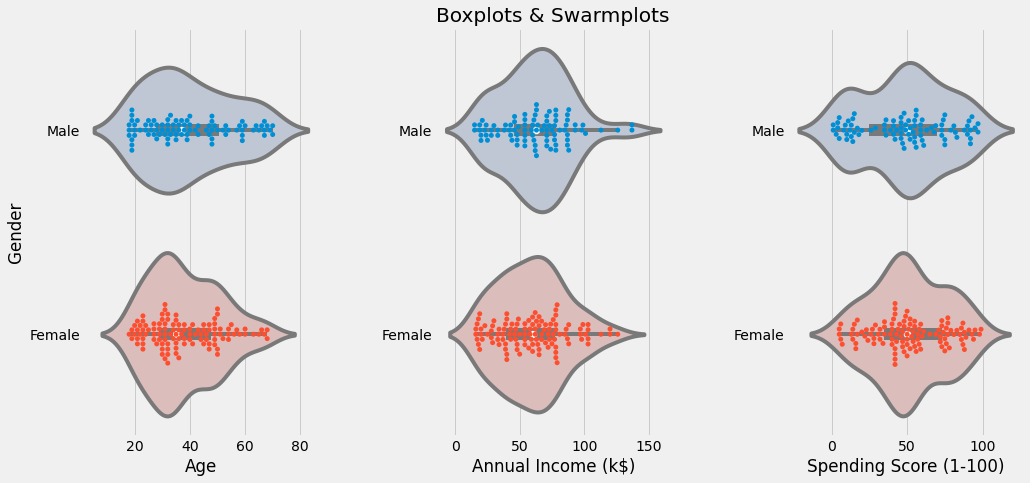

In [19]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
    sns.swarmplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

plt.show()

## CLUSTERING

### 1. AGE VS SPENDING SCORE

In [20]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(
        n_clusters = n,
        init = 'k-means++',
        n_init = 10,
        max_iter = 300,
        tol = 0.0001,
        random_state = 111,
        algorithm = 'elkan'
    ))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

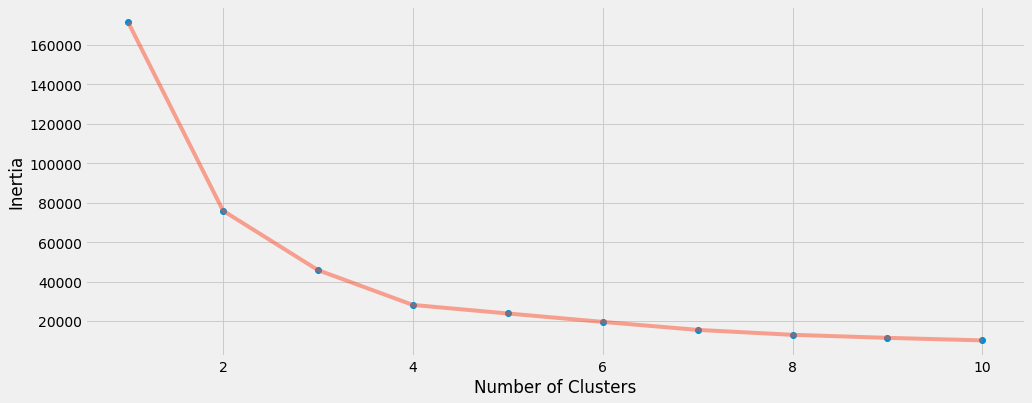

In [21]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Using the elbow method, we determine that the optimal number of clusters for the given data set is 4. The method works by plotting the total sum of squared distances between each data point and its assigned centroid for a range of different numbers of clusters.
The goal is to find the optimal number of clusters, k, that balances the trade-off between reducing the total sum of squared distances (inertia) and increasing the number of clusters. The "elbow" in the plot represents the point at which increasing the number of clusters no longer significantly reduces the total sum of squared distances. The value of k at the elbow is typically taken as the optimal number of clusters.

In [22]:
algorithm = (KMeans(
    n_clusters = 4,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    tol = 0.0001,
    random_state = 111,
    algorithm = 'elkan'
))

algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [23]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

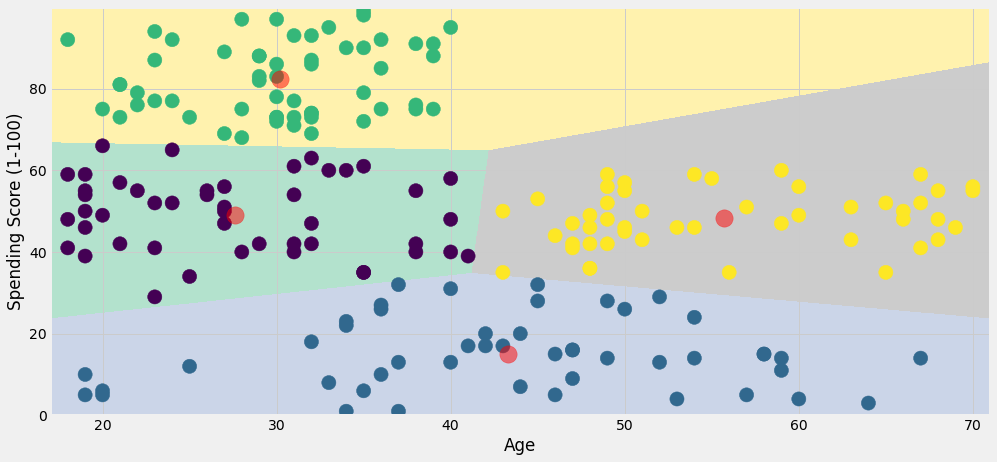

In [24]:
plt.figure(1, figsize=(15,7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x = 'Age',y = 'Spending Score (1-100)',data = df,c = labels1,s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

### 2. ANNUAL INCOME VS SPENDING SCORE

In [30]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

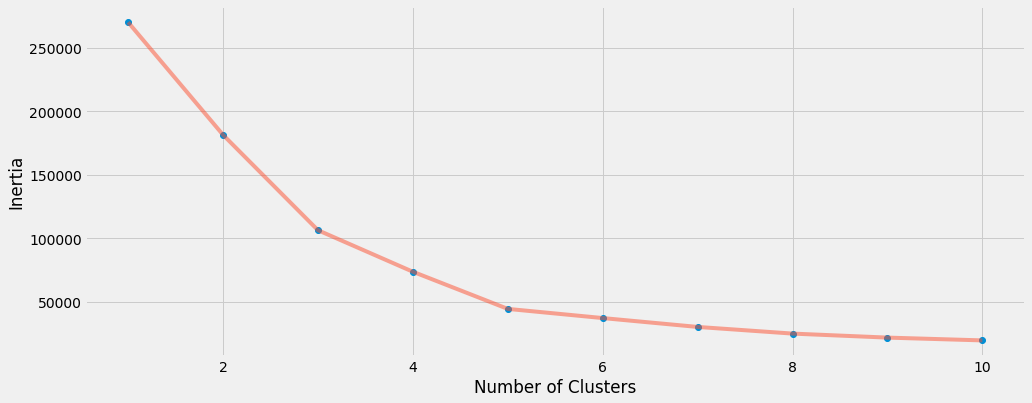

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [32]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [33]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

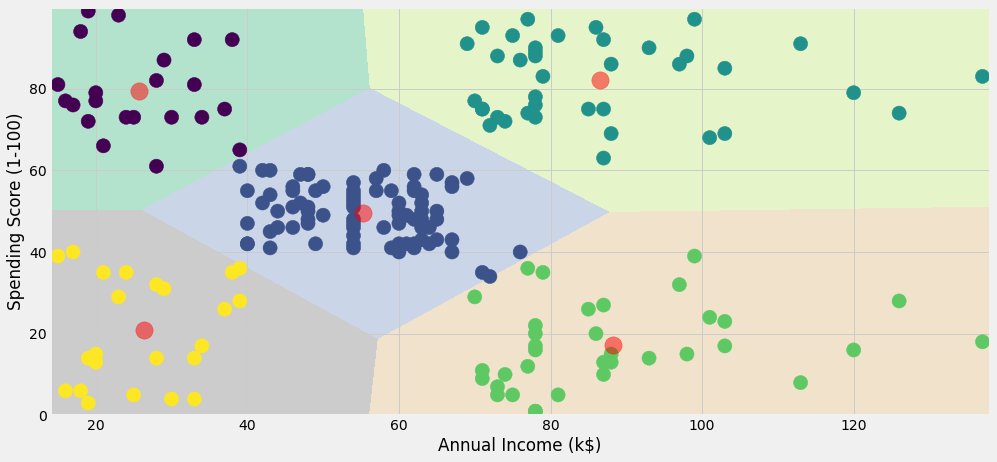

In [34]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [35]:
data = pd.DataFrame(X2, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df = pd.DataFrame(centroids2, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df["Labels"] = [f"Centroid {i}" for i in range(centroids2.shape[0])]
data['labels'] = labels2
fig = px.scatter(data, x='Annual Income (k$)', y='Spending Score (1-100)', color='labels', labels={'Labels':'Cluster'})
fig.add_scatter(x=centroids_df['Annual Income (k$)'], y=centroids_df['Spending Score (1-100)'],
                mode='markers',
                marker= dict(size=20, color='red'),
                name='Centroids')
fig.show()

### 3. SEGMENTATION USING AGE, ANNUAL INCOME AND SPENDING SCORE

In [36]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(
        n_clusters = n ,
        init='k-means++',
        n_init = 10 ,
        max_iter=300, 
        tol=0.0001,
        random_state= 111  ,
        algorithm='elkan') )
    
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

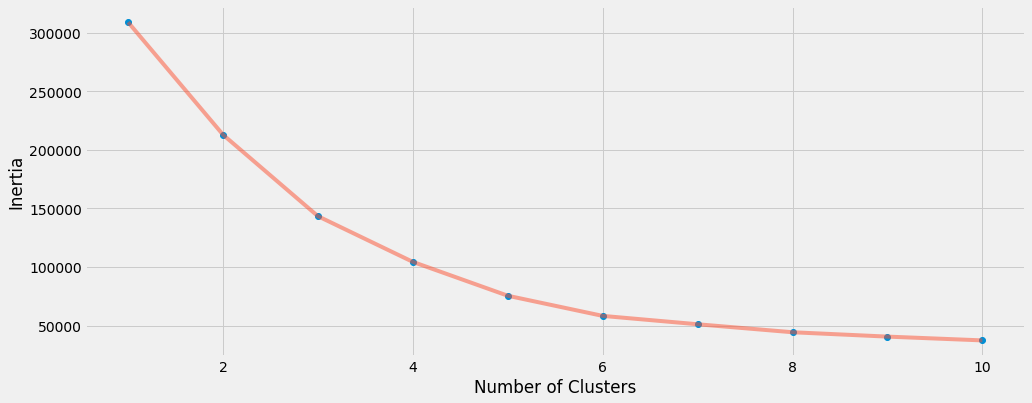

In [37]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [38]:
algorithm = (KMeans(n_clusters = 6 ,
                    init='k-means++', 
                    n_init = 10 ,
                    max_iter=300, 
                    tol=0.0001,
                    random_state= 111  , 
                    algorithm='elkan') )

algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [39]:
data = df.copy()
data['label3'] = labels3
trace1 = go.Scatter3d(
    x = data['Age'],
    y = data['Spending Score (1-100)'],
    z = data['Annual Income (k$)'],
    mode = 'markers',
    marker = {
        'color': data['label3'],
        'size': 20,
        'line': {'color':data['label3'], 'width': 12},
        'opacity': 0.8
    }
)

Data = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = {
        'xaxis': {'title': 'Age'},
        'yaxis': {'title': 'Spending Score'},
        'zaxis': {'title': "Annual Income"}
    }
)

fig = go.Figure(data=Data, layout=layout)
fig.show()

## CONCLUSION

By using a k-means clustering on retail data, several actionable insights can be gathered:

1. Customer Segmentation: The k-means algorithm can be used to segment customers into different groups based on their age, gender, annual income, and spending score. This information can be used to develop targeted marketing strategies and offer customized promotions to different customer segments.

2. Spending Habits: The spending score of customers can be used to identify patterns in customer spending habits. This information can be used to make decisions about product placement, inventory management, and pricing strategies.

3. Demographic Trends: The age and gender information can be used to identify demographic trends among customers. This information can be used to make decisions about product offerings and marketing strategies.

4. Customer Loyalty: The annual income and spending score of customers can be used to identify loyal customers. This information can be used to reward loyal customers and increase customer retention.

5. Market Basket Analysis: The spending score of customers can be used to identify products that are commonly purchased together. This information can be used to make decisions about product placement and promotional strategies.

These insights can be used to make data-driven decisions about product offerings, marketing strategies, customer service, and other important aspects of running a mall.